In [14]:
#Imports and constants 
################################################################

import csv
import graphviz
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from sklearn import tree
from sklearn import svm

from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_selection import RFE,SelectKBest,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, label_binarize, Imputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from IPython.display import display, HTML


#set numpy random seed for reproducible results
np.random.seed(1234)
#to view the whole output in the jupyter console (not only an extract)
np.set_printoptions(threshold=np.nan)

#Data parameter
#################################################################
#File paths
TEST_PATH ='dataset/aps_failure_test_set.csv'
TRAIN_PATH ='dataset/aps_failure_training_set.csv'

#Columns of the readed dataframe
COLUMNS = ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'co_000', 'cp_000', 'cq_000', 'cr_000', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ct_000', 'cu_000', 'cv_000', 'cx_000', 'cy_000', 'cz_000', 'da_000', 'db_000', 'dc_000', 'dd_000', 'de_000', 'df_000', 'dg_000', 'dh_000', 'di_000', 'dj_000', 'dk_000', 'dl_000', 'dm_000', 'dn_000', 'do_000', 'dp_000', 'dq_000', 'dr_000', 'ds_000', 'dt_000', 'du_000', 'dv_000', 'dx_000', 'dy_000', 'dz_000', 'ea_000', 'eb_000', 'ec_00', 'ed_000', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009', 'ef_000', 'eg_000']
#Columns of the the final dataframe with processed histograms
HISTOGRAMMERGEDCOLUMNS = ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
                           'ah_000', 'ai_000',
                          'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000',
                          'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000',
                             'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 
                          'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 
                          'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 
                          'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 
                          'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 
                          'cj_000', 'ck_000', 'cl_000', 'cm_000', 
                          'co_000', 'cp_000', 'cq_000', 'cr_000',  
                          'ct_000', 'cu_000', 'cv_000', 'cx_000', 'cy_000', 'cz_000', 'da_000', 
                          'db_000', 'dc_000', 'dd_000', 'de_000', 'df_000', 'dg_000', 'dh_000', 
                          'di_000', 'dj_000', 'dk_000', 'dl_000', 'dm_000', 'dn_000', 'do_000', 
                          'dp_000', 'dq_000', 'dr_000', 'ds_000', 'dt_000', 'du_000', 'dv_000', 
                          'dx_000', 'dy_000', 'dz_000', 'ea_000', 'eb_000', 'ec_00', 'ed_000', 
                          'ef_000', 'eg_000','ag_median','ay_median', 'az_median', 'ba_median','cn_median','cs_median','ee_median']

#possible Class Labels in the dataset
CLASS_LABELS = ['neg', 'pos']
#Parameter to skip the first [SKIPROWS] lines in the csv files before reading into the dataframe
SKIPROWS = 20

#Histogram columns
AG = np.array(['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009'])
AY = np.array(['ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009'])
AZ = np.array(['az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009'])
BA = np.array(['ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009'])
CN = np.array(['cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009'])
CS = np.array(['cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009'])
EE = np.array(['ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009'])

#NAN Data preprocessing parameter
NaNSTRATEGY = ['mean', 'median', 'most_frequent']

In [3]:
#All Methods dealing with the data preprocessing 
##################################################################################

#Reads the csv file from the given path as a pandas dataframe
#returns the dataframe
def loadDatasetWithPandas(path, skiprowsNum):
    # Reading the raw data from csv file
    rawData = pd.read_csv(path, skiprows=skiprowsNum)
    # replacing the string indicating missing values with the numpy value for missing values
    NaNProcessedData = rawData.replace({'na': np.nan}, regex=True)
    return NaNProcessedData

#creates a new dataframe from the given datafame where the different histogram bins are processed into a new feature.
#returned dataframe is structured according to 'HISTOGRAMMERGEDCOLUMNS' variable
def histogramProcessing(dataf):
    data_set=dataf
    ag_ = data_set[AG]
    ay_ = data_set[AY]
    az_ = data_set[AZ]
    ba_ = data_set[BA]
    cn_ = data_set[CN]
    cs_ = data_set[CS]
    ee_ = data_set[EE]
    
    # create new dataframe for each of the above with the mean\n",
    ag_mean = ag_.mean(axis=1, skipna=True)
    ay_mean = ay_.mean(axis=1, skipna=True)
    az_mean = az_.mean(axis=1, skipna=True)
    ba_mean = ba_.mean(axis=1, skipna=True)
    cn_mean = cn_.mean(axis=1, skipna=True)
    cs_mean = cs_.mean(axis=1, skipna=True)
    ee_mean = ee_.mean(axis=1, skipna=True)

    remaining_columns = np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.array(COLUMNS), AG), AY), AZ), BA), CN), CS), EE)
    remaining_columns= np.concatenate([['class'],remaining_columns])
    remaining_data = data_set[remaining_columns]
    return pd.concat(
        [
            remaining_data,
            ag_mean.rename('ag_median'),
            ay_mean.rename('ay_median'),
            az_mean.rename('az_median'),
            ba_mean.rename('ba_median'),
            cn_mean.rename('cn_median'),
            cs_mean.rename('cs_median'),
            ee_mean.rename('ee_median')
        ],
        axis=1
    )

#processes the NaN values in data frame according to the provided strategy (mean, median or most_frequent) usinjg scikits Imputer.
# returns a dataframe without any NaN values
def processNaNInDataset(data, strategy):
    values = data[list(COLUMNS)].values
    imp = Imputer(missing_values='NaN', strategy=strategy, axis=0)
    imp = imp.fit(values)
    cleanedValues = imp.transform(values)
    return cleanedValues

#loads the csv and uses the 3 methods above to process file (loading, Nan processing)
#returns the loaded testdatframe and trainingdataframe
def loadDataset(strategy):
    #Load Train Dataset
    trainData = loadDatasetWithPandas(TRAIN_PATH, SKIPROWS)
    #Load Test Dataset
    testData = loadDatasetWithPandas(TEST_PATH, SKIPROWS)
    #if no strategy for nan processing is provided just return the laoded dataframes
    if(strategy == None):
        return trainData, testData

    #remove class column from datset to allow conversion to float datatype
    removeClassTrain = trainData.iloc[:,1:171]
    removeClassTest = testData.iloc[:,1:171]
    # change datatype of the dataframe to allow computing of the mean of a column (otherwise an overflow will happen)
    removeClassTrain = removeClassTrain.astype('float64')
    processedTrain = processNaNInDataset(removeClassTrain,strategy)

    removeClassTest = removeClassTest.astype('float64')
    processedTest = processNaNInDataset(removeClassTest,strategy)
   

    finalTrainFrame = pd.concat(
            [
                pd.DataFrame(trainData.iloc[:,0]),
                pd.DataFrame(processedTrain, columns=COLUMNS)
            ],
            axis=1
        )

    finalTestFrame = pd.concat(
            [
                pd.DataFrame(testData.iloc[:,0]),
                pd.DataFrame(processedTest, columns=COLUMNS)
            ],
            axis=1
        )
    return finalTrainFrame, finalTestFrame

In [26]:
#This Method reduces features based the Correlation between the features.
def CorrelationFeatureSelection(DataFrame,X,Y,flag):
    #####Feature Selection with Co-relation####
    # Create correlation matrix
    corr_matrix = X.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    # Drop features
    # newDataFrame = X.drop(X.columns[to_drop], axis=1)
    print("Features to Drop ")
    print(to_drop)

    # Creating the DataFrame with Selected Features.
    if flag == "Train":
        Readydf = DataFrame[DataFrame.columns.difference(to_drop)]


    elif flag == "Test":
        Readydf = DataFrame[DataFrame.columns.difference(to_drop)]

    return Readydf


#This Method reduces features selecting the K best features using Chi Square.
#X = feature set, Y = class lable values, FtreNo = No of features to be selected.
def SelectKbest(DataFrame,X,Y,FtreNo,flag):

    #####Feature Extraction with Univariate Statistical Tests####

    # feature extraction
    selector = SelectKBest(score_func=chi2, k=FtreNo)
    fit = selector.fit(X, Y)
    # summarize scores
    np.set_printoptions(precision=3)

    #print("Fit Score")
    #print(fit.scores_)
    features = fit.transform(X)

    # get selected feature names
    Selected_feature_names = X.columns[selector.get_support()]
    print("Selected Feature names: ")
    print(Selected_feature_names)

    #Creating the DataFrame with Selected Features.
    if flag == "Train":
        Readydf = pd.DataFrame(DataFrame, columns=Selected_feature_names)

    elif flag == "Test":
        Readydf = pd.DataFrame(DataFrame, columns=Selected_feature_names)

    return Readydf

######Feature elimination by low varience####
def lowVarfilterfeatures(DataFrame):
    print("The Std Dev are: ")
    pd.options.display.float_format = '{:.5f}'.format
    #print(preprocessedData)
    print(DataFrame.std())
    #print(DataFrame.std() > 2.90)
    #print(DataFrame.drop(DataFrame.var()[DataFrame.var() > 2.90].index.values, axis=1))


def filterfeatures(DataFrame, FtreSelMthd, FtreNo, flag):

    #array = ImputedDataFrame.values
    #Ftr = array[:, 0:107]
    #ClsLbl = array[:, 107]


    # Seperating the features from the class lable
    X = DataFrame[DataFrame.columns.difference(['class'])]
    Y = pd.DataFrame(DataFrame, columns=['class'])

    #Based on the feature selection technique the respective method will be called.
    if FtreSelMthd == "Corelation" :
        FeatureSelected_Df = CorrelationFeatureSelection(DataFrame,X,Y,flag)
    elif FtreSelMthd == "SelectKBest":
        FeatureSelected_Df =SelectKbest(DataFrame,X,Y,FtreNo,flag)
        
    FeatureSelected_Df = pd.concat([FeatureSelected_Df,DataFrame[['class']]], axis = 1)

    return FeatureSelected_Df

In [5]:
#All methods dealing with evaluation
#################################################################################

#computes/plots scikit classification report, confusion matrix and calculates the overall cost of the result using the formula provided in the dataset
def evaluate(trueLabels, predictions):
    classificationRep = classification_report(trueLabels, predictions)
    print(classificationRep)
    
    confusionMatrix = confusion_matrix(trueLabels,predictions) 
    #print(confusionMatrix)
    #np.set_printoptions(precision=2)
    #Code for plotting Confusion matrix
    plt.figure()
    plot_confusion_matrix(confusionMatrix, classes=CLASS_LABELS,
                          title='Confusion matrix, without normalization')
    plt.figure()
    plot_confusion_matrix(confusionMatrix, classes=CLASS_LABELS, normalize=True,
                      title='Normalized confusion matrix')
    plt.show()
    #####################
    score = calculateOverallCostFromConfusionMatrix(confusionMatrix)
    print('Score: ' + str(score))
    return score
    
#calculates the overall cost from the given confusionMAtrix
def calculateOverallCostFromConfusionMatrix(confusionMatrix):
    #cost function from description
    score = confusionMatrix[1][0] * 500 + 10*confusionMatrix[0][1]
    return score

#plots the roc curve for given true labels and the predicted results
def plot_roc(true_lables, predictions):
    true_labels_binarized = label_binarize(true_lables, classes=['neg', 'pos']).flatten()
    predictions_binarized = label_binarize(predictions, classes=['neg', 'pos']).flatten()
    false_positives, true_positives, thresholds = roc_curve(true_labels_binarized, predictions_binarized, pos_label=1)
    roc_auc = auc(false_positives, true_positives)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positives, true_positives, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

#taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
#Loading of all datasets and possible imputations (thus data has to be loaded only once)
####################################################################

#Data, NAN not processed (rows with empty values removed)
trainSet, testSet = loadDataset(None)
trainSet.dropna(inplace=True)
testSet.dropna(inplace=True)
trainSet  = pd.DataFrame(trainSet)
testSet  = pd.DataFrame(testSet)

#Normal data NAN Processed (different strategys used)
meanTrainSet, meanTestSet = loadDataset(NaNSTRATEGY[0])
medianTrainSet, medianTestSet = loadDataset(NaNSTRATEGY[1])
mostFrequentTrainSet, mostFrequentTestSet = loadDataset(NaNSTRATEGY[2])

#Processed Histogram from normal, with NaN processed data
meanTrainSetHist = histogramProcessing(meanTrainSet)
meanTestSetHist = histogramProcessing(meanTestSet)
medianTrainSetHist = histogramProcessing(medianTrainSet)
medianTestSetHist = histogramProcessing(medianTestSet)
mostFrequentTrainSetHist = histogramProcessing(mostFrequentTrainSet)
mostFrequentTestSetHist = histogramProcessing(mostFrequentTestSet)

In [27]:
FtreSelMthd = "SelectKBest"
FtreNo = 20

featureSelectedMeanTrainDf = filterfeatures(meanTrainSet, FtreSelMthd, FtreNo, "Train")
featureSelectedMeanTestDf = filterfeatures(meanTestSet, FtreSelMthd, FtreNo, "Test")

featureSelectedMedianTrainDf = filterfeatures(medianTrainSet, FtreSelMthd, FtreNo, "Train")
featureSelectedMedianTestDf = filterfeatures(medianTestSet, FtreSelMthd, FtreNo, "Test")

featureSelectedFrequentTrainDf = filterfeatures(mostFrequentTrainSet, FtreSelMthd, FtreNo, "Train")
featureSelectedFrequentTestDf = filterfeatures(mostFrequentTestSet, FtreSelMthd, FtreNo, "Test")

Selected Feature names: 
Index(['ag_005', 'ah_000', 'an_000', 'ao_000', 'ap_000', 'ay_008', 'az_005', 'ba_000', 'bb_000', 'bg_000', 'bu_000', 'bv_000', 'bx_000', 'cc_000', 'ci_000', 'cn_004', 'cq_000', 'cs_005', 'dq_000', 'eb_000'], dtype='object')


,ag_005,ah_000,an_000,ao_000,ap_000,ay_008,az_005,ba_000,bb_000,bg_000,bu_000,bv_000,bx_000,cc_000,ci_000,cn_004,cq_000,cs_005,dq_000,eb_000,class
0,1.432864e+06,2.551696e+06,4.933296e+06,3.655166e+06,1.766008e+06,7.558760e+05,5.526276e+06,2.328746e+06,6.700214e+06,2.551696e+06,6.700214e+06,6.700214e+06,6.599892e+06,6.167850e+06,5.245752e+06,1.309472e+06,6.700214e+06,4.015854e+06,0.000000e+00,2.801180e+06,neg
1,6.532940e+05,1.393352e+06,2.560898e+06,2.127150e+06,1.084598e+06,9.956000e+04,1.873902e+06,1.378576e+06,3.646660e+06,1.393352e+06,3.646660e+06,3.646660e+06,3.582034e+06,2.942850e+06,2.291079e+06,1.179502e+06,3.646660e+06,1.837600e+06,0.000000e+00,3.477820e+06,neg
2,3.705920e+05,1.234132e+06,2.371990e+06,2.173634e+06,3.007960e+05,1.450312e+06,7.106720e+05,7.906900e+05,2.673338e+06,1.234132e+06,2.673338e+06,2.673338e+06,2.678534e+06,2.560566e+06,2.322692e+06,1.215280e+06,2.673338e+06,1.744838e+06,0.000000e+00,1.040120e+06,neg
3,3.232000e+03,2.668000e+03,1.018400e+04,7.554000e+03,1.076400e+04,5.596000e+03,2.478000e+03,6.176000e+03,2.161400e+04,2.668000e+03,2.161400e+04,2.161400e+04,2.177200e+04,7.710000e+03,2.135040e+03,2.170000e+03,2.161400e+04,4.836000e+03,2.014000e+03,0.000000e+00,neg
4,1.966618e+06,1.974038e+06,3.230626e+06,2.618878e+06,1.058136e+06,5.840740e+05,3.911734e+06,1.348578e+06,4.289260e+06,1.974038e+06,4.289260e+06,4.289260e+06,4.283332e+06,3.946944e+06,3.565685e+06,2.497104e+06,4.289260e+06,2.288268e+06,0.000000e+00,2.117305e+07,neg
5,7.017020e+05,1.087760e+06,2.283060e+06,1.892752e+06,4.692440e+05,4.472740e+05,2.615652e+06,1.037372e+06,2.752812e+06,1.087760e+06,2.752812e+06,2.752812e+06,2.762528e+06,2.663042e+06,2.379996e+06,9.781640e+05,2.752812e+06,1.874972e+06,0.000000e+00,0.000000e+00,neg
6,3.766000e+03,2.094000e+03,1.246000e+04,1.104400e+04,2.292000e+03,6.118000e+03,4.492000e+03,4.332000e+03,1.476400e+04,2.094000e+03,1.476400e+04,1.476400e+04,1.569000e+04,6.158000e+03,1.989120e+03,3.912000e+03,1.476400e+04,1.402000e+03,0.000000e+00,0.000000e+00,neg
7,1.424620e+05,2.738458e+06,5.586558e+06,4.916376e+06,1.193648e+06,5.176380e+05,5.618652e+06,1.699220e+06,6.781222e+06,2.738458e+06,6.781222e+06,6.781222e+06,6.800488e+06,6.106804e+06,5.587531e+06,1.693440e+06,6.781222e+06,4.436996e+06,0.000000e+00,3.537310e+06,neg
8,4.407040e+05,3.209768e+06,6.289144e+06,5.590784e+06,1.256914e+06,5.030950e+06,7.090548e+06,3.982850e+06,7.547346e+06,3.209768e+06,7.547346e+06,7.547346e+06,7.544078e+06,7.164376e+06,5.363482e+06,1.446554e+06,7.547346e+06,3.676070e+06,0.000000e+00,4.006100e+05,neg
9,3.265360e+05,2.658638e+06,5.566182e+06,4.426834e+06,1.571480e+06,9.601820e+05,9.511260e+05,7.029940e+05,7.167172e+06,2.658638e+06,7.167172e+06,7.167172e+06,1.065896e+06,6.785612e+06,1.477941e+07,4.134500e+05,7.167172e+06,3.999360e+05,0.000000e+00,0.000000e+00,pos


Selected Feature names: 
Index(['ag_005', 'ah_000', 'an_000', 'ao_000', 'ap_000', 'ay_008', 'az_005', 'ba_000', 'bb_000', 'bg_000', 'bu_000', 'bv_000', 'bx_000', 'cc_000', 'ci_000', 'cn_004', 'cq_000', 'cs_005', 'dq_000', 'eb_000'], dtype='object')
Selected Feature names: 
Index(['ac_000', 'ag_005', 'ah_000', 'an_000', 'ao_000', 'ap_000', 'ay_008', 'az_005', 'bb_000', 'bg_000', 'bu_000', 'bv_000', 'bx_000', 'cc_000', 'ci_000', 'cn_004', 'cq_000', 'cs_005', 'dq_000', 'eb_000'], dtype='object')
Selected Feature names: 
Index(['ac_000', 'ah_000', 'an_000', 'ao_000', 'ap_000', 'ay_008', 'az_005', 'ba_000', 'bb_000', 'bg_000', 'bu_000', 'bv_000', 'bx_000', 'cc_000', 'ci_000', 'cn_004', 'cq_000', 'cs_005', 'dq_000', 'eb_000'], dtype='object')
Selected Feature names: 
Index(['ac_000', 'ag_005', 'ah_000', 'an_000', 'ao_000', 'ap_000', 'ay_008', 'az_005', 'bb_000', 'bg_000', 'bu_000', 'bv_000', 'bx_000', 'cc_000', 'ci_000', 'cn_004', 'cq_000', 'cs_005', 'dq_000', 'eb_000'], dtype='object')
Sele

             precision    recall  f1-score   support

        neg       1.00      0.95      0.97     15625
        pos       0.30      0.97      0.46       375

avg / total       0.98      0.95      0.96     16000

Confusion matrix, without normalization
[[14791   834]
 [   13   362]]
Normalized confusion matrix
[[0.947 0.053]
 [0.035 0.965]]


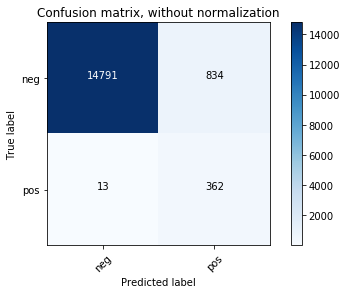

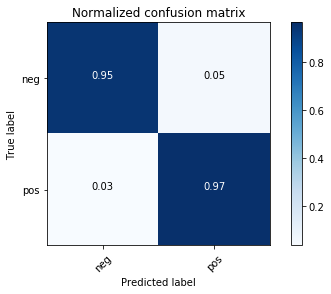

Score: 14840


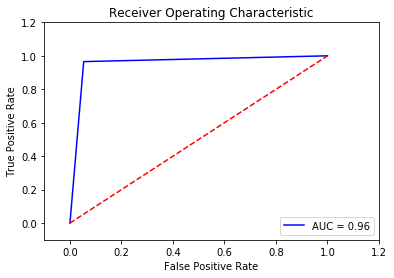

'\n#Hisotgram mean as feature\nclassifier = DecisionTreeClassifier()#class_weight={\'pos\':.983, \'neg\':.017},max_depth =max_depth, min_samples_leaf =min_samples_leaf)  \nclassifier.fit(pd.DataFrame(data=meanTrainSetHist,columns=HISTOGRAMMERGEDCOLUMNS), pd.DataFrame(data=meanTrainSetHist,columns=[\'class\']))  \npredictions = classifier.predict(pd.DataFrame(data=meanTestSetHist,columns=HISTOGRAMMERGEDCOLUMNS))  \nscore = evaluate(pd.DataFrame(data=meanTestSetHist,columns=[\'class\']), predictions)\n\n\nclassifier = DecisionTreeClassifier()#class_weight={\'pos\':.983, \'neg\':.017},max_depth =max_depth, min_samples_leaf =min_samples_leaf)  \nclassifier.fit(pd.DataFrame(data=medianTrainSetHist,columns=HISTOGRAMMERGEDCOLUMNS), pd.DataFrame(data=medianTrainSetHist,columns=[\'class\']))  \npredictions = classifier.predict(pd.DataFrame(data=medianTestSetHist,columns=HISTOGRAMMERGEDCOLUMNS))  \nscore = evaluate(pd.DataFrame(data=medianTestSetHist,columns=[\'class\']), predictions)\n\nclassif

In [28]:
#Implementation of scikit Decision Tree
###########################################################


#Use max_depth, and min_sample leafs to prevent overfitting according to http://scikit-learn.org/stable/modules/tree.html#tree 1.10.5
'''
#histogram bin as feature
classifier = DecisionTreeClassifier()#class_weight={'pos':.983, 'neg':.017},max_depth =max_depth, min_samples_leaf =min_samples_leaf)  
classifier.fit(pd.DataFrame(data=meanTrainSet,columns=COLUMNS), pd.DataFrame(data=meanTrainSet,columns=['class']))  
predictions = classifier.predict(pd.DataFrame(data=meanTestSet,columns=COLUMNS))  
score = evaluate(pd.DataFrame(data=meanTestSet,columns=['class']), predictions)
'''


columnList = featureSelectedMeanTrainDf[featureSelectedMeanTrainDf.columns.difference(['class'])].columns.values


classifier = DecisionTreeClassifier(class_weight={'pos':.983, 'neg':.017},max_depth =3)  
classifier.fit(pd.DataFrame(data=featureSelectedMeanTrainDf,columns=columnList), pd.DataFrame(data=featureSelectedMeanTrainDf,columns=['class']))  
predictions = classifier.predict(pd.DataFrame(data=featureSelectedMeanTestDf,columns=columnList))  
score = evaluate(pd.DataFrame(data=featureSelectedMeanTestDf,columns=['class']), predictions)

plot_roc(mostFrequentTestSet['class'], predictions)

'''
#Hisotgram mean as feature
classifier = DecisionTreeClassifier()#class_weight={'pos':.983, 'neg':.017},max_depth =max_depth, min_samples_leaf =min_samples_leaf)  
classifier.fit(pd.DataFrame(data=meanTrainSetHist,columns=HISTOGRAMMERGEDCOLUMNS), pd.DataFrame(data=meanTrainSetHist,columns=['class']))  
predictions = classifier.predict(pd.DataFrame(data=meanTestSetHist,columns=HISTOGRAMMERGEDCOLUMNS))  
score = evaluate(pd.DataFrame(data=meanTestSetHist,columns=['class']), predictions)


classifier = DecisionTreeClassifier()#class_weight={'pos':.983, 'neg':.017},max_depth =max_depth, min_samples_leaf =min_samples_leaf)  
classifier.fit(pd.DataFrame(data=medianTrainSetHist,columns=HISTOGRAMMERGEDCOLUMNS), pd.DataFrame(data=medianTrainSetHist,columns=['class']))  
predictions = classifier.predict(pd.DataFrame(data=medianTestSetHist,columns=HISTOGRAMMERGEDCOLUMNS))  
score = evaluate(pd.DataFrame(data=medianTestSetHist,columns=['class']), predictions)

classifier = DecisionTreeClassifier(class_weight={'pos':.983, 'neg':.017},max_depth =max_depth, min_samples_leaf =min_samples_leaf)  
classifier.fit(pd.DataFrame(data=mostFrequentTrainSetHist,columns=HISTOGRAMMERGEDCOLUMNS), pd.DataFrame(data=mostFrequentTrainSetHist,columns=['class']))  
predictions = classifier.predict(pd.DataFrame(data=mostFrequentTestSetHist,columns=HISTOGRAMMERGEDCOLUMNS))  
score = evaluate(pd.DataFrame(data=mostFrequentTestSetHist,columns=['class']), predictions)


#Printing of the decision tree
dot_data = tree.export_graphviz(classifier, out_file=None, class_names=CLASS_LABELS, feature_names=COLUMNS, 
                         filled=True, rounded=True,) 
graph = graphviz.Source(dot_data) 
graph.render("DT")

'''

             precision    recall  f1-score   support

        neg       0.99      0.99      0.99     15625
        pos       0.65      0.70      0.67       375

avg / total       0.98      0.98      0.98     16000

Confusion matrix, without normalization
[[15484   141]
 [  114   261]]
Normalized confusion matrix
[[0.990976 0.009024]
 [0.304    0.696   ]]


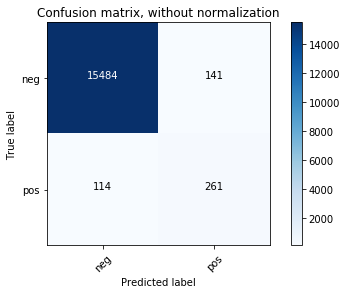

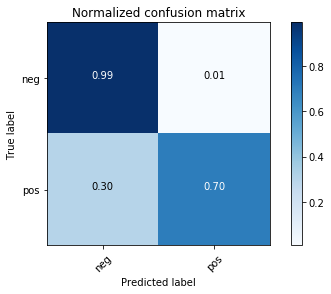

Score: 58410


In [7]:
#Implementation of scikit Support vector Machine(Linear)
#################################################################################
linearSvm = svm.LinearSVC(class_weight={'pos':.983, 'neg':.017})

target = pd.DataFrame(data=mostFrequentTrainSet,columns=['class'])

linearSvm.fit(pd.DataFrame(data=mostFrequentTrainSet,columns=COLUMNS),target.values.ravel())  
predictions = linearSvm.predict(pd.DataFrame(data=mostFrequentTestSet,columns=COLUMNS))  
score = evaluate(pd.DataFrame(data=mostFrequentTestSet,columns=['class']), predictions)